In [1]:
!pip3 install torch torchvision
!pip install torchsummary
!pip install pyunpack
!pip install patool

    100% |████████████████████████████████| 2.0MB 9.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  [PIL]
You must restart the runtime in order to use newly installed versions.
  Running setup.py bdist_wheel for pyunpack ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
  Running setup.py bdist_wheel for easyprocess ... - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/41/22/19/af15ef6264c58b625a82641ed7483ad05e258fbd8925505227
Successfully built pyunpack easyprocess
    100% |████████████████████████████████| 81kB 3.8MB/s 


In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torchsummary import summary
from pyunpack import Archive
from torch.autograd import Variable
from logging import Logger
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanchit2843","key":"60f3bf5b207ec03851f344c9a6984da9"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle competitions download -c cifar-10

  0% 0.00/3.04M [00:00<?, ?B/s]
100% 3.04M/3.04M [00:00<00:00, 99.0MB/s]
100% 609M/610M [00:06<00:00, 129MB/s]
100% 610M/610M [00:06<00:00, 102MB/s]
 85% 89.0M/105M [00:00<00:00, 77.7MB/s]
100% 105M/105M [00:00<00:00, 114MB/s]  
  0% 0.00/575k [00:00<?, ?B/s]
100% 575k/575k [00:00<00:00, 80.9MB/s]


In [0]:
Archive('train.7z').extractall('.')

In [0]:
import os
a = os.listdir('/content/train')

In [0]:
img_name = os.path.join('/content/train', a[0])

In [0]:
a[0]

In [0]:
import cv2
from torch.utils.data import Dataset, DataLoader
class DataLoader(Dataset):
  def __init__(self,a,root_dir):
    self.a = a
    self.root_dir = root_dir
  def __len__(self):
      return len(a)
  def __getitem__(self, idx):
      img_name = os.path.join(self.root_dir, a[idx])
      target = cv2.imread(img_name)
      input_img = cv2.imread(img_name,0)
      target = target/255
      return input_img,target

In [55]:
# input to output
class Generator_1(nn.Module):
  def __init__(self):
    super(Generator_1,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(1,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(32,64,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    #Deconvolution
    self.deconv1 = nn.Sequential(
                                nn.ConvTranspose2d(128,64,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv2 = nn.Sequential(
                                nn.ConvTranspose2d(64,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv3 = nn.Sequential(
                                nn.ConvTranspose2d(32,3,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(3),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv4 = nn.Sequential(
                                nn.ConvTranspose2d(3,3,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(3),
                              )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.deconv1(x)
    x = self.deconv2(x)
    x = self.deconv3(x)
    x = F.tanh(self.deconv4(x))
    return x
  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G_BC = Generator_1().to(device)
summary(G_BC, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 15, 15]             544
       BatchNorm2d-2           [-1, 32, 15, 15]              64
         LeakyReLU-3           [-1, 32, 15, 15]               0
            Conv2d-4             [-1, 64, 6, 6]          32,832
       BatchNorm2d-5             [-1, 64, 6, 6]             128
         LeakyReLU-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
       BatchNorm2d-8            [-1, 128, 4, 4]             256
         LeakyReLU-9            [-1, 128, 4, 4]               0
  ConvTranspose2d-10             [-1, 64, 6, 6]          73,792
      BatchNorm2d-11             [-1, 64, 6, 6]             128
        LeakyReLU-12             [-1, 64, 6, 6]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
      BatchNorm2d-14           [-1, 32,

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [56]:
# input to output
class Generator_2(nn.Module):
  def __init__(self):
    super(Generator_2,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(3,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(32,64,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    #Deconvolution
    self.deconv1 = nn.Sequential(
                                nn.ConvTranspose2d(128,64,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv2 = nn.Sequential(
                                nn.ConvTranspose2d(64,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv3 = nn.Sequential(
                                nn.ConvTranspose2d(32,1,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(1),
                                nn.LeakyReLU(0.5)
                              )
    self.deconv4 = nn.Sequential(
                                nn.ConvTranspose2d(1,1,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(1),
                              )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.deconv1(x)
    x = self.deconv2(x)
    x = self.deconv3(x)
    x = F.tanh(self.deconv4(x))
    return x
  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G_CB = Generator_2().to(device)
summary(G_CB, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 15, 15]           1,568
       BatchNorm2d-2           [-1, 32, 15, 15]              64
         LeakyReLU-3           [-1, 32, 15, 15]               0
            Conv2d-4             [-1, 64, 6, 6]          32,832
       BatchNorm2d-5             [-1, 64, 6, 6]             128
         LeakyReLU-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
       BatchNorm2d-8            [-1, 128, 4, 4]             256
         LeakyReLU-9            [-1, 128, 4, 4]               0
  ConvTranspose2d-10             [-1, 64, 6, 6]          73,792
      BatchNorm2d-11             [-1, 64, 6, 6]             128
        LeakyReLU-12             [-1, 64, 6, 6]               0
  ConvTranspose2d-13           [-1, 32, 14, 14]          32,800
      BatchNorm2d-14           [-1, 32,

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [0]:
root_dir = '/content/train'
dataset = DataLoader(a,root_dir)

In [0]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

In [57]:
class Discriminator_1(nn.Module):
  def __init__(self):
    super(Discriminator_1,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(3,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(32,64,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv4 = nn.Sequential(
                                nn.Conv2d(128,256,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.fc1 = nn.Sequential( 
                                nn.Linear(1024, 512),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc2 = nn.Sequential( 
                                nn.Linear(512, 128),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc3 = nn.Sequential( 
                                nn.Linear(128, 1),                             
                            )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = x.view(-1,1024)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = F.sigmoid(x)
    return x
D_B = Discriminator_1().to(device)
summary(D_B, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 15, 15]           1,568
       BatchNorm2d-2           [-1, 32, 15, 15]              64
         LeakyReLU-3           [-1, 32, 15, 15]               0
            Conv2d-4             [-1, 64, 6, 6]          32,832
       BatchNorm2d-5             [-1, 64, 6, 6]             128
         LeakyReLU-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
       BatchNorm2d-8            [-1, 128, 4, 4]             256
         LeakyReLU-9            [-1, 128, 4, 4]               0
           Conv2d-10            [-1, 256, 2, 2]         295,168
      BatchNorm2d-11            [-1, 256, 2, 2]             512
        LeakyReLU-12            [-1, 256, 2, 2]               0
           Linear-13                  [-1, 512]         524,800
        LeakyReLU-14                  [

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [58]:
class Discriminator_2(nn.Module):
  def __init__(self):
    super(Discriminator_2,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(1,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(32,64,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv4 = nn.Sequential(
                                nn.Conv2d(128,256,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(256),
                                nn.LeakyReLU(0.5)
                              )
    self.fc1 = nn.Sequential( 
                                nn.Linear(1024, 512),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc2 = nn.Sequential( 
                                nn.Linear(512, 128),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc3 = nn.Sequential( 
                                nn.Linear(128, 1),                             
                            )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = x.view(-1,1024)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = F.sigmoid(x)
    return x
D_C = Discriminator_2().to(device)
summary(D_C, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 15, 15]             544
       BatchNorm2d-2           [-1, 32, 15, 15]              64
         LeakyReLU-3           [-1, 32, 15, 15]               0
            Conv2d-4             [-1, 64, 6, 6]          32,832
       BatchNorm2d-5             [-1, 64, 6, 6]             128
         LeakyReLU-6             [-1, 64, 6, 6]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
       BatchNorm2d-8            [-1, 128, 4, 4]             256
         LeakyReLU-9            [-1, 128, 4, 4]               0
           Conv2d-10            [-1, 256, 2, 2]         295,168
      BatchNorm2d-11            [-1, 256, 2, 2]             512
        LeakyReLU-12            [-1, 256, 2, 2]               0
           Linear-13                  [-1, 512]         524,800
        LeakyReLU-14                  [

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
import torch.optim as optim
d_B_optimizer = optim.Adam(D_B.parameters(), lr=0.000001)
d_C_optimizer = optim.Adam(D_C.parameters(), lr=0.000001)
g_BC_optimizer = optim.Adam(G_BC.parameters(), lr=0.01)
g_CB_optimizer = optim.Adam(G_CB.parameters(), lr=0.01)

criterion_GAN = torch.nn.MSELoss()
criterion_cycle = torch.nn.L1Loss()

In [0]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    data = data.type(torch.cuda.FloatTensor)
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    data = data.type(torch.cuda.FloatTensor)
    return data

In [0]:
'''def train_discriminator(real,fake,optimizer):
  optimizer.zero_grad()
  N = real.size(0)
  #real_data
  prediction_real = discriminator(real)
  error_real = loss(prediction_real, zeros_target(N))
  error_real.backward()
  #fake_data
  prediction_fake = discriminator(fake)
  error_fake = loss(prediction_fake,ones_target(N))
  error_fake.backward()
  optimizer.step()
  return (error_real + error_fake)/2, prediction_real, prediction_fake'''

In [0]:
'''def train_generator(optimizer, fake , real_data):
    optimizer.zero_grad()
    N = fake.size(0)
    error2 = loss1(real_data,fake)
    error2.backward()
    optimizer.step()
    error=1
    # Sample noise and generate fake data
    #prediction = discriminator(fake_data)
    #error = loss(prediction, zeros_target(N))
    #error.backward()
    #optimizer.step()

    return error,error2'''

In [0]:
!mkdir generated

In [0]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from IPython.display import Image
torch.backends.cudnn.benchmark=True
for epoch in range(100):
  for n_batch,(input_img,output_img) in enumerate(dataloader):
        N = input_img.size(0)
        #loss for generator B-->C
        input_img = input_img.view(N,1,32,32)
        input_img = input_img.to(device)
        input_img = input_img.type(torch.cuda.FloatTensor)
        output_img = output_img.view(N,3,32,32)
        output_img = output_img.to(device)
        output_img = output_img.type(torch.cuda.FloatTensor)
        g_BC_optimizer.zero_grad()
        g_CB_optimizer.zero_grad()
        
        G_BC.train()
        fake_data_BC = G_BC(input_img).detach()
        loss_bc = criterion_GAN(fake_data_BC,output_img)
        #loss for generator C --> B
        
        G_CB.train()
        fake_data_CB = G_CB(output_img).detach()
        loss_cb = criterion_GAN(fake_data_CB,input_img)
        loss_gan = (loss_bc+loss_cb)/2
        
        #Cycle loss
        
        recovered_B = G_CB(fake_data_BC)
        loss_cycle_B = criterion_cycle(recovered_B , input_img)
        recovered_C = G_BC(fake_data_CB)
        loss_cycle_C = criterion_cycle(recovered_C , output_img)
        loss_cycle = (loss_cycle_B + loss_cycle_C)/2
        
        # total loss gan
        loss_g = loss_gan + 5*loss_cycle
        
        # Train generator
        loss_g.backward()
        g_BC_optimizer.step()
        g_CB_optimizer.step()
        
        if(n_batch%100 == 0):
          # train Discriminator B --> C
          d_B_optimizer.zero_grad()
          real_image = D_B(output_img)
          loss_real = criterion_GAN(real_image , zeros_target(N))

          fake_image = D_B(fake_data_BC)
          loss_fake = criterion_GAN(fake_image , ones_target(N))
          loss_B = (loss_real + loss_fake) / 2
          loss_B.backward()
          d_B_optimizer.step()


          # Train Discriminator C --> B

          d_C_optimizer.zero_grad()
          real_image = D_C(input_img)
          loss_real = criterion_GAN(real_image , zeros_target(N))
          fake_image = D_C(fake_data_CB)
          loss_fake = criterion_GAN(fake_image , ones_target(N))
          loss_C = (loss_real + loss_fake) / 2
          loss_C.backward()
          d_C_optimizer.step()

        
        # Display Progress every few batches
        if(n_batch%600==0):
          print('epochs : {}'.format(epoch) ,  'g_error : {}'.format(loss_g) , 'd_error : {}'.format(loss_B))
        
  torch.optim.lr_scheduler.StepLR(g_optimizer, 2, gamma=0.1, last_epoch=-1)
  G_BC.eval()
  image,_ = dataset[4]
  image = image.reshape((32,32,1))
  image = torch.from_numpy(image)
  image = image.type(torch.cuda.FloatTensor)
  image = image.view(1,1,32,32)
  target = G_BC(image).detach()
  b = target.to(torch.device("cpu"))
  b = b.numpy()
  b = np.reshape(b,(32,32,3))
  b = b*255
  cv2.imwrite('/content/generated/{}.png'.format(epoch),b)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epochs : 0 g_error : 10001.072265625 d_error : 0.2505524158477783
epochs : 0 g_error : 9299.5244140625 d_error : 0.24899007380008698
epochs : 0 g_error : 9211.935546875 d_error : 0.24729476869106293
epochs : 1 g_error : 10358.6298828125 d_error : 0.24622982740402222
epochs : 1 g_error : 9831.3193359375 d_error : 0.2507566809654236
epochs : 1 g_error : 9831.072265625 d_error : 0.248005211353302
epochs : 2 g_error : 8413.3447265625 d_error : 0.251693993806839
epochs : 2 g_error : 9197.921875 d_error : 0.24900028109550476
epochs : 2 g_error : 9622.6806640625 d_error : 0.24772875010967255
epochs : 3 g_error : 10148.517578125 d_error : 0.2516041100025177
epochs : 3 g_error : 10024.978515625 d_error : 0.249679297208786
epochs : 3 g_error : 9553.8232421875 d_error : 0.2515483796596527
epochs : 4 g_error : 9127.287109375 d_error : 0.251237690448761
epochs : 4 g_error : 8449.4814453125 d_error : 0.2509765625
epochs : 4 g_error : 8722.060546875 d_error : 0.2497122883796692
epochs : 5 g_error : 8

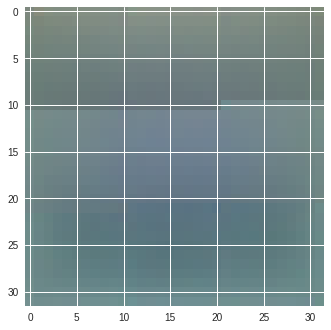

In [54]:
import cv2
_,target = dataset[4]

c = cv2.imread('/content/generated/34.png')
plt.imshow(c)

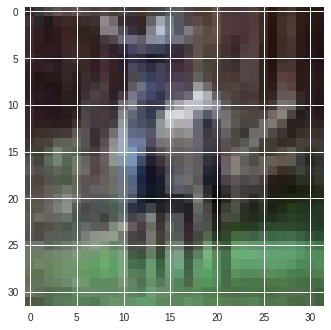

In [49]:
plt.imshow(target)

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class double_conv(nn.Module):
    '''(conv => BN => ReLU) * 2'''
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        #  would be a nice idea if the upsampling could be learned too,
        #  but my machine do not have enough memory to handle all those weights
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch//2, in_ch//2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        
        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX//2,
                        diffY // 2, diffY - diffY//2))
        
        # for padding issues, see 
        # https://github.com/HaiyongJiang/U-Net-Pytorch-Unstructured-Buggy/commit/0e854509c2cea854e247a9c615f175f76fbb2e3a
        # https://github.com/xiaopeng-liao/Pytorch-UNet/commit/8ebac70e633bac59fc22bb5195e513d5832fb3bd

        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

In [0]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256)
        self.up2 = up(512, 128)
        self.up3 = up(256, 64)
        self.up4 = up(128, 64)
        self.outc = outconv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return F.sigmoid(x)

In [0]:
!pip install torchsummary
from torchsummary import summary


In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(1,3).to(device)
summary(model, (1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]             640
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]          36,928
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
       double_conv-7           [-1, 64, 32, 32]               0
            inconv-8           [-1, 64, 32, 32]               0
         MaxPool2d-9           [-1, 64, 16, 16]               0
           Conv2d-10          [-1, 128, 16, 16]          73,856
      BatchNorm2d-11          [-1, 128, 16, 16]             256
             ReLU-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 128, 16, 16]         147,584
      BatchNorm2d-14          [-1, 128,

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
